# Linear Regression

We can think of linear regression as the "grandfather" of supervised machine learning.  It developed as an important technique in statistics long before machine learning existed as a field in its own right.  The idea in supervised learning is that we have a data set called the **training data**.  The training data consists of a set of pairs $\{ \, ( x^{(1)},y^{(1)} ), ( x^{(2)},y^{(2)} ) \ldots, ( x^{(m)},y^{(m)} ) \, \}$, where each input variable $x^{(i)}$ is a vector called a **feature vector**, and the output variables $y^{(i)}$ (usually real numbers) are the corresponding **labels**.  

If $\mathcal{X}$ is the input space and $\mathcal{Y}$ is the output space, then the objective of a supervised learning algorithm is to "learn" a function $h: \mathcal{X} \rightarrow \mathcal{Y}$ that approximates the training data and will generalize in order to predit the output for new instances.  When the target space $\mathcal{Y}$ consists of continuous data, then the learning problem is called a **regression** problem.  When the target space $\mathcal{Y}$ consists of discrete data, then the learning problem is called a **classification** problem.

## Simple Linear Regression

In simple linear regression, we have $\mathcal{X} = \mathcal{Y} = \mathbb{R}$, so that $h: \mathbb{R} \rightarrow \mathbb{R}$ is a function from the real numbers to the real numbers, and $h$ is a linear function of the form $h_{\theta}(x) = \theta_0 + \theta_1 x$, where $\theta_1, \theta_2$ are called the **weights**.  The training data will then consist of a bunch of points in the plane, and we are trying the find a line that "best fits" the data.  This line is called the **least squares line**:

<img src="least_squares_line.png">
<br/>

The image is the same one that's in the [wikipedia article](https://en.wikipedia.org/wiki/Linear_regression) about linear regression.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = os.getcwd() + '/ex1data1.txt'
df = pd.read_csv(filepath, names = ['population', 'profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
# the population and profit columns above are in units of 10,000
# so let's change the values back to the raw numbers
df = df.apply(lambda x: x*10000)
df.head()

,population,profit
0,61101.0,175920.0
1,55277.0,91302.0
2,85186.0,136620.0
3,70032.0,118540.0
4,58598.0,68233.0


In [4]:
# get some basic statistics
df.describe().apply(lambda x: x.round(2))

,population,profit
count,97.00,97.00
mean,81598.00,58391.35
std,38698.84,55102.62
min,50269.00,-26807.00
25%,57077.00,19869.00
50%,65894.00,45623.00
75%,85781.00,70467.00
max,222030.00,241470.00


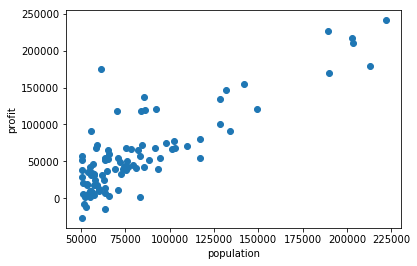

In [5]:
# Make a scatterplot of the data
plt.scatter(df.population, df.profit)
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

## Gradient descent algorithm

$$ \textrm{Cost Function :} \quad J(\theta) = \frac{1}{2} \sum_{i=1}^m ( h_{\theta}(x^{(i)}) - y^{(i)} )^2 $$

In [16]:
def cost(X, y, theta):
    '''Compute the cost function. 
    Inputs:
    X is an m by n matrix, where m = # of training examples
                                 n = # of features
    y is an n-dimensional vector (array)
    theta is an m-dimensional vector (array)'''
    
    squared_error = np.power( np.dot(theta, X) - y, 2 )
    return 0.5 * sum(squared_error)
    

In [52]:
# test the function with some examples.  
X = np.random.randint(10, size = (3, 3))
print(X)
# we define all the x_0s to be 1 by convention (so the formula above is cleaner) 
X = np.insert(X, 0, 1, axis = 1)
y = np.random.randint(10, size = 4)
theta = np.random.randint(10, size = 3)
print('X =', X)
print('y =', y)
print('theta =', theta)

[[9 1 0]
 [9 7 1]
 [6 3 6]]
X = [[1 9 1 0]
 [1 9 7 1]
 [1 6 3 6]]
y = [9 5 7 4]
theta = [0 6 9]


In [53]:
print( 'theta*X =', np.dot(theta, X) )
print( 'theta*X - y =', np.dot(theta, X) - y )
squared_error = np.power(np.dot(theta, X) - y, 2 )
print('squared_error =', squared_error)
print( 'cost =', 0.5 * sum(squared_error) )

theta*X = [ 15 108  69  60]
theta*X - y = [  6 103  62  56]
squared_error = [   36 10609  3844  3136]
cost = 8812.5


In [54]:
cost(X,y,theta)

8812.5